In [ ]:
from google.colab import data_table
data_table.enable_dataframe_formatter()

In [ ]:
import pathlib # manipulate paths
import glob 
# import tensorflow as tf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from pathlib import Path
import plotly.express as px

In [ ]:
# Now you can Unzip it!
# !unzip -q <SOURCE-PATH> -d <DESTINATION-PATH>

!unzip -q /content/drive/MyDrive/DATASET/NLP/summer-products-and-sales-in-ecommerce-wish.zip -d ./ecommerce # save to local Colab

In [ ]:
# Load Dataset
df = pd.read_csv("/content/ecommerce/keywords-popular_2021-04/mainstream/summer.csv")

# Missing Value Display and Handle

In [ ]:
df.isna().sum()

title                                    2
title_orig                              69
discount_price                          69
discount_price_currency                 69
retail_price                            69
retail_price_currency                   69
discount_price_in_original_currency     69
nb_cart_orders_approx                   69
nb_units_purchased_approx              970
uses_ad_boosts                         970
rating                                  69
rating_count                            69
rating_five_count                      294
rating_four_count                      294
rating_three_count                     294
rating_two_count                       294
rating_one_count                       294
badges_count                           970
badge_local_product                    970
badge_product_quality                  970
badge_fast_shipping                    970
tags                                   970
product_color                          132
product_var

In [ ]:
def plot_missing_data(df):
    columns_with_null = df.columns[df.isna().sum() > 0]
    null_pct = (df[columns_with_null].isna().sum() / df.shape[0]).sort_values(ascending=False) * 100
    plt.figure(figsize=(8,6));
    sns.barplot(y = null_pct.index, x = null_pct, orient='h')
    plt.title('% Na values in dataframe by columns');

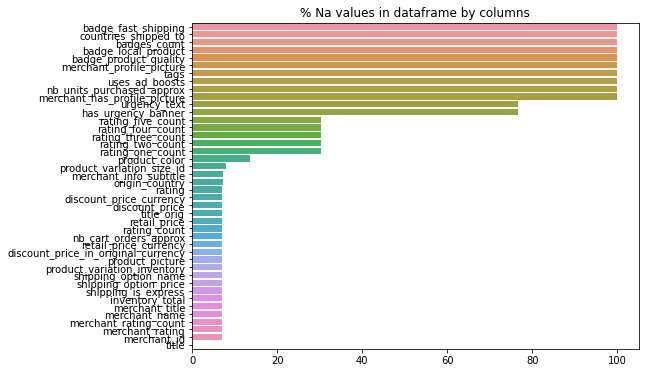

In [ ]:
plot_missing_data(df)

In [ ]:
df_columns = (df.isna().sum()>200).reset_index()

In [ ]:
columns = df_columns[df_columns.iloc[:,1]==True]['index']

In [ ]:
df.drop(columns= columns,inplace=True)

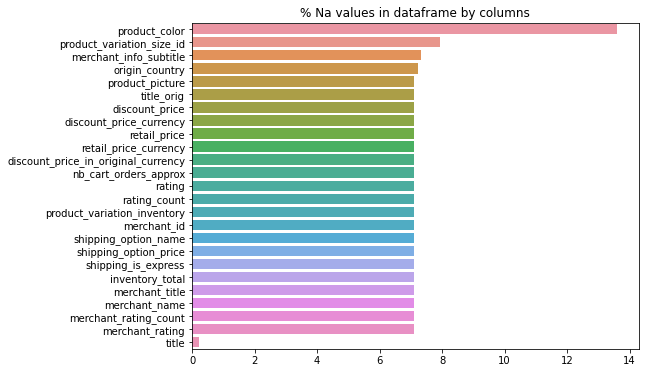

In [ ]:
plot_missing_data(df)

In [ ]:
df[df['merchant_rating'].isna()].isna().sum()

title                                   2
title_orig                             69
discount_price                         69
discount_price_currency                69
retail_price                           69
retail_price_currency                  69
discount_price_in_original_currency    69
nb_cart_orders_approx                  69
rating                                 69
rating_count                           69
product_color                          69
product_variation_size_id              69
product_variation_inventory            69
shipping_option_name                   69
shipping_option_price                  69
shipping_is_express                    69
inventory_total                        69
origin_country                         69
merchant_title                         69
merchant_name                          69
merchant_info_subtitle                 69
merchant_rating_count                  69
merchant_rating                        69
merchant_id                       

In [ ]:
df = df[~df['merchant_rating'].isna()]
df.isna().sum()

title                                   0
title_orig                              0
discount_price                          0
discount_price_currency                 0
retail_price                            0
retail_price_currency                   0
discount_price_in_original_currency     0
nb_cart_orders_approx                   0
rating                                  0
rating_count                            0
product_color                          63
product_variation_size_id               8
product_variation_inventory             0
shipping_option_name                    0
shipping_option_price                   0
shipping_is_express                     0
inventory_total                         0
origin_country                          1
merchant_title                          0
merchant_name                           0
merchant_info_subtitle                  2
merchant_rating_count                   0
merchant_rating                         0
merchant_id                       

In [ ]:
df.fillna('Unknown',inplace=True)

In [ ]:
df.isna().sum()

title                                  0
title_orig                             0
discount_price                         0
discount_price_currency                0
retail_price                           0
retail_price_currency                  0
discount_price_in_original_currency    0
nb_cart_orders_approx                  0
rating                                 0
rating_count                           0
product_color                          0
product_variation_size_id              0
product_variation_inventory            0
shipping_option_name                   0
shipping_option_price                  0
shipping_is_express                    0
inventory_total                        0
origin_country                         0
merchant_title                         0
merchant_name                          0
merchant_info_subtitle                 0
merchant_rating_count                  0
merchant_rating                        0
merchant_id                            0
product_url     

# Drop columns with 1 unique data

In [ ]:
ls = df.nunique()
ls[ls==1]

discount_price_currency    1
retail_price_currency      1
dtype: int64

In [ ]:
df.drop(labels = ['discount_price_currency', 'retail_price_currency'], axis=1, inplace=True)

# Extract positive review percent of Merchant

In [ ]:
df['merchant_info_subtitle'][0]

'94 % avis positifs (74,181 notes)'

In [ ]:
import re

In [ ]:
def removes(df):
  pattern =r'\d{1,2} ?%'
  match_list = re.findall(pattern,df['merchant_info_subtitle'])
  if len(match_list)!=0 : # there's a match
     return match_list[0].strip('[').strip(']').strip('%').strip()
  else: return '-1'

In [ ]:
df['merchant_info_subtitle'] = df.apply(removes,axis=1)

In [ ]:
df[['merchant_info_subtitle']]

,merchant_info_subtitle
0,94
1,67
2,-1
3,-1
4,85
...,...
962,80
963,82
964,85
967,80


In [ ]:
df.rename(columns={'merchant_info_subtitle':'merchant_positive_percent'},inplace=True)

In [ ]:
df['merchant_positive_percent'] = df['merchant_positive_percent'].astype('float')

In [ ]:
df.columns[df.isna().sum()<0]

Index([], dtype='object')

# reform ID

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['merchant_id'] = le.fit_transform(df['merchant_id'])

In [ ]:
df['product_id'] = le.fit_transform(df['product_id'])

# Outliers Removing

In [ ]:
px.scatter(df, x='discount_price', y='rating',marginal_x='box', title='discount Price vs rating')

In [ ]:
df[df['discount_price'] == df['discount_price'].max()]

,title,title_orig,discount_price,retail_price,discount_price_in_original_currency,nb_cart_orders_approx,rating,rating_count,product_color,product_variation_size_id,product_variation_inventory,shipping_option_name,shipping_option_price,shipping_is_express,inventory_total,origin_country,merchant_title,merchant_name,merchant_positive_percent,merchant_rating_count,merchant_rating,merchant_id,product_url,product_picture,product_id
401,Icaris Modern One Piece Pew All-in-One Piece F...,Icaris Modern One Piece Pew All-in-One Piece F...,203.0,203.0,245.0,0.0,5.0,0.0,beige,l,50.0,Livraison standard,12.0,False,50.0,KR,Stay_Gorgeous Korea,stay_gorgeouskorea,0.0,5.0,4.8,558,https://www.wish.com/c/5fe6dde6e40496580df6be36,https://canary.contestimg.wish.com/api/webimag...,593


In [ ]:
df.drop(index=401,axis=0,inplace=True)

In [ ]:
px.scatter(df, x='discount_price', y='rating',marginal_x='box', title='discount Price vs rating')

# product_variation_size_id

In [ ]:
df['product_variation_size_id'].unique()

array(['Unknown', 'free', '3xs', 's', 'xs', 'shirts', '2.5', 'xxs', 'm',
       'asianxs', '5xs', 'size-s', 'l/xl', '2pcs',
       'blackt-shirtwhitewords-xs', 'l', 'xs.', 'eu35/(us5)', 'm/l',
       '-xs', '2xl', '01-s', 'women-s', 'randomcolor', '7xl', 'onesize',
       '34', 'shortskirt-m', 's/m', '0s', 'xl', '100',
       'kids0-6m(60)..1pcs', '56', 'xxl', 'uk10', 'size/xs', 'unisize',
       'sizexxs', '90(child)', '165cm/m', 'xxxl', 'shortss', 's-1pc',
       'xs/s', '38', 'size-xxxs', 's.', '35', 'sizexs', 'm,unitedstates',
       '10ml', 's(nobelt)', '28', '4xl', 's_', '4', 'asiansizem',
       'bear-m', 'eu41&us8', '32', 'xxxxxs', '1', '3xl/4xl', '40',
       'select', 'm/l-us8-10', '34-35', '28(s).', 'm.',
       '6pcs-s-15x11.5cm', 'xs-', '34/35(22cm)', '37', '33', 'xxxs',
       'sizes', 'onecolor', 'xxxxxl', 'silver&silver.', 'unisexs',
       '100cm/2-3years', '-s', '100x100cm(39.3x39.3inch)', '2years',
       '22-23', 's,poland', 'normalstyle(adjustable)', 'daughter-3t',

In [ ]:
# Use the below pattern and the string.replace method to replace abbreviations / special characters in BeanOrigin
# Each element in the list replacements contains a pair of value
# First element of the pair is the text character to replace
# Second element is the character to be replaced with

replacements =  [['free', 'onesize'],
    ['100', 'onesize'],
    ['unisize', 'onesize'],
    ['90', 'onesize'],
    ['unisexs', 'onesize'],
    ['100cm/2-3years', 'onesize'],
    ['2years', 'onesize'],
    ['normalstyle(adjustable)', 'onesize'],
    ['daughter-3t', 'onesize'],
    ['shirts','allsize'],
    ['kids0-6m(60)..1pcs','allsize'], ['2.5', '34'],
    ['asianxs', 'xs'],
    ['blackt-shirtwhitewords-xs', 'xs'],
     ['-xs', 'xs'],
     ['01-s', 'xs'],
     ['size/xs', 'xs'],
     ['xs-', 'xs'],
     ['xs..', 'xs'], 
    ['size-s', 's'],
    ['women-s', 's'],
     ['0s', 's'],
     ['shortss', 's'],
     ['s-1pc', 's'],
     ['s(nobelt)', 's'],
     ['s_', 's'],
     ['28(s).', 's'],
     ['6pcs-s-15x11.5cm', 's'],
     ['s,poland', 's'], 
    ['l/xl', 'twosize'],
    ['2pcs', 'twosize'],
     ['m/l', 'twosize'],
     ['s/m', 'twosize'],
     ['xs/s', 'twosize'],
     ['10ml', 'twosize'],
     ['1', 'twosize'],
     ['3xl/4xl', 'twosize'],
     ['m/l-us8-10', 'twosize'],
     ['34-35', 'twosize'],
     ['34/35(22cm)', 'twosize'],
     ['22-23', 'twosize'],
    ['eu35/(us5)', '35'],
    ['shortskirt-m', 'm'],
    ['uk10', 'm'],
     ['165cm/m', 'm'],
     ['m,unitedstates', 'm'],
     ['asiansizem', 'm'],
     ['bear-m', 'm'],
     ['m.', 'm'],
    ['sizexxs', '2xs'],
    ['xxxl', '3xl'],
    ['size-xxxs', '3xs'],
    ['xxxs', '3xs'],
    ['eu41&us8', '8'],
    ['xxxxxs', '5s'],
    ['select', 'Unknown'],
    ['sizes', 'Unknown'],
     ['onecolor', 'Unknown'],
     ['randomcolor', 'Unknown'],
     ['silver&silver.', 'Unknown'],
     ['100x100cm(39.3x39.3inch)', 'Unknown'],
     ['a', 'Unknown'],
    ['xxxxxl', '5xl'],
    ['xxxxl', '4xl']
]

# YOUR CODE HERE
for r in replacements:
    df['product_variation_size_id'] = df['product_variation_size_id'].replace(r[0], r[1])

In [ ]:
replacements =  [['-s', 's'],['s.', 's'],['5s', 's'], ['xxl', '2xl'], ['xxs','2xl'],['sizexs', 'xs'],['90(child)','90'],
                 ['xs.', 'xs'],['Unknown', 'others'],['allsize', 'others'], ['twosize', 'others'], ['onesize','others']
]

# YOUR CODE HERE
for r in replacements:
    df['product_variation_size_id'] = df['product_variation_size_id'].replace(r[0], r[1])

In [ ]:
size_ordering = ['extra_small_size', 'xs', 's', 'm', 'l', 'xl','extra_big_size']
def size(col):
    ls = size_ordering
    if col not in ls:
        return 'others'
    return col

In [ ]:
df['product_variation_size_id'] = df['product_variation_size_id'].apply(size)

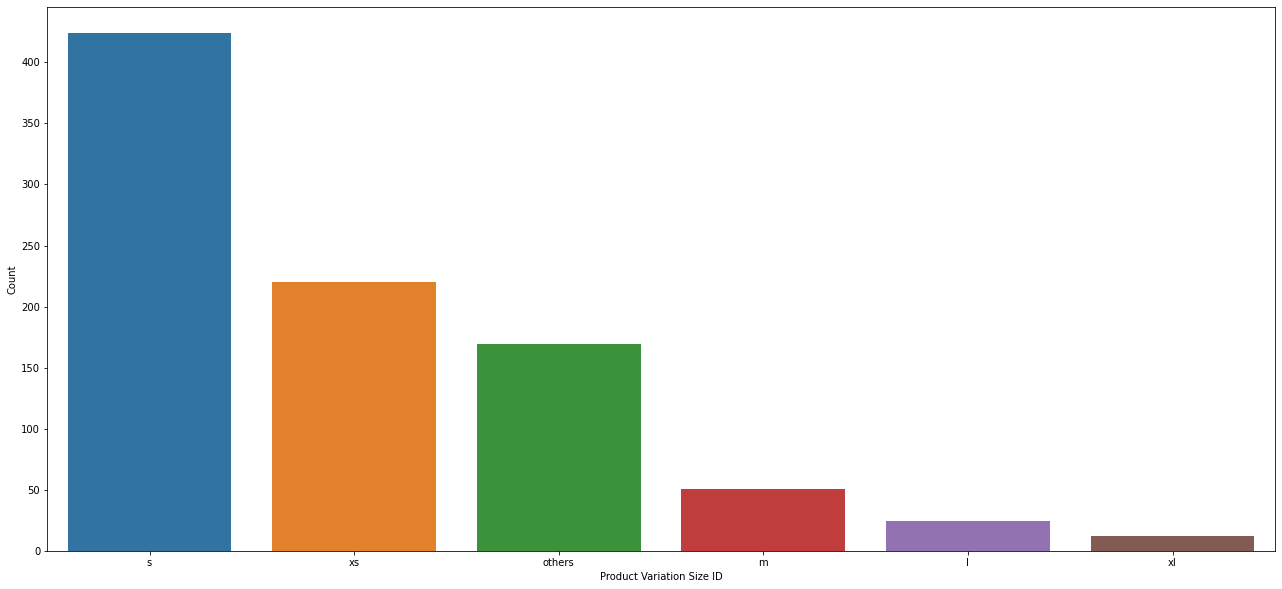

In [ ]:
plt.figure(figsize=(22,10))
sns.countplot(x = 'product_variation_size_id', data = df, order = df['product_variation_size_id'].value_counts().iloc[:].index)
plt.xlabel('Product Variation Size ID')
plt.ylabel('Count')
plt.show()

# Product Color

In [ ]:
df['product_color'].replace('armygreen', 'green', inplace=True)
df['product_color'].replace('winered', 'red', inplace=True)
df['product_color'].replace('navyblue', 'blue', inplace=True)
df['product_color'].replace('lightblue', 'blue', inplace=True)
df['product_color'].replace('khaki', 'green', inplace=True)
df['product_color'].replace('gray', 'grey', inplace=True)
df['product_color'].replace('rosered', 'red', inplace=True)
df['product_color'].replace('skyblue', 'blue', inplace=True)
df['product_color'].replace('coffee', 'brown', inplace=True)
df['product_color'].replace('darkblue', 'blue', inplace=True)
df['product_color'].replace('rose', 'red', inplace=True)
df['product_color'].replace('fluorescentgreen', 'green', inplace=True)
df['product_color'].replace('navy', 'blue', inplace=True)
df['product_color'].replace('lightpink', 'pink', inplace=True)

In [ ]:
df['product_color'].replace('orange-red', 'red', inplace=True)
df['product_color'].replace('Black', 'black', inplace=True)
df['product_color'].replace('lightgreen', 'green', inplace=True)
df['product_color'].replace('White', 'white', inplace=True)

In [ ]:
df['product_color'].replace('wine', 'red', inplace=True)
df['product_color'].replace('Pink', 'pink', inplace=True)
df['product_color'].replace('Army green', 'green', inplace=True)
df['product_color'].replace('coralred', 'red', inplace=True)
df['product_color'].replace('lightred', 'red', inplace=True)
df['product_color'].replace('apricot', 'orange', inplace=True)
df['product_color'].replace('navy blue', 'blue', inplace=True)
df['product_color'].replace('burgundy', 'red', inplace=True)
df['product_color'].replace('silver', 'grey', inplace=True)
df['product_color'].replace('camel', 'brown', inplace=True)
df['product_color'].replace('lakeblue', 'blue', inplace=True)
df['product_color'].replace('lightyellow', 'yellow', inplace=True)
df['product_color'].replace('watermelonred', 'red', inplace=True)
df['product_color'].replace('coolblack', 'black', inplace=True)
df['product_color'].replace('applegreen', 'green', inplace=True)
df['product_color'].replace('mintgreen', 'green', inplace=True)
df['product_color'].replace('dustypink', 'pink', inplace=True)

In [ ]:
df['product_color'].replace('ivory', 'white', inplace=True)
df['product_color'].replace('lightkhaki', 'green', inplace=True)
df['product_color'].replace('lightgray', 'grey', inplace=True)
df['product_color'].replace('darkgreen', 'green', inplace=True)
df['product_color'].replace('RED', 'red', inplace=True)
df['product_color'].replace('tan', 'brown', inplace=True)
df['product_color'].replace('jasper', 'red', inplace=True)
df['product_color'].replace('nude', 'white', inplace=True)
df['product_color'].replace('army', 'brown', inplace=True)
df['product_color'].replace('light green', 'green', inplace=True)
df['product_color'].replace('offwhite', 'white', inplace=True)
df['product_color'].replace('Blue', 'blue', inplace=True)
df['product_color'].replace('denimblue', 'blue', inplace=True)
df['product_color'].replace('Rose red', 'red', inplace=True)
df['product_color'].replace('lightpurple', 'purple', inplace=True)
df['product_color'].replace('prussianblue', 'blue', inplace=True)
df['product_color'].replace('offblack', 'black', inplace=True)
df['product_color'].replace('violet', 'purple', inplace=True)
df['product_color'].replace('gold', 'yellow', inplace=True)
df['product_color'].replace('wine red', 'red', inplace=True)
df['product_color'].replace('rosegold', 'red', inplace=True)
df['product_color'].replace('claret', 'red', inplace=True)
df['product_color'].replace('army green', 'green', inplace=True)
df['product_color'].replace('lightgrey', 'grey', inplace=True)

In [ ]:
def color(col):
    ls = ['black', 'white', 'blue', 'red', 'green', 'yellow', 'pink', 'grey', 'purple', 'orange', 'brown', 'beige']
    if col not in ls:
        if '&' in col:
            return 'dual'
        else:
            return 'others'
    return col

df['product_color'] = df['product_color'].apply(color)

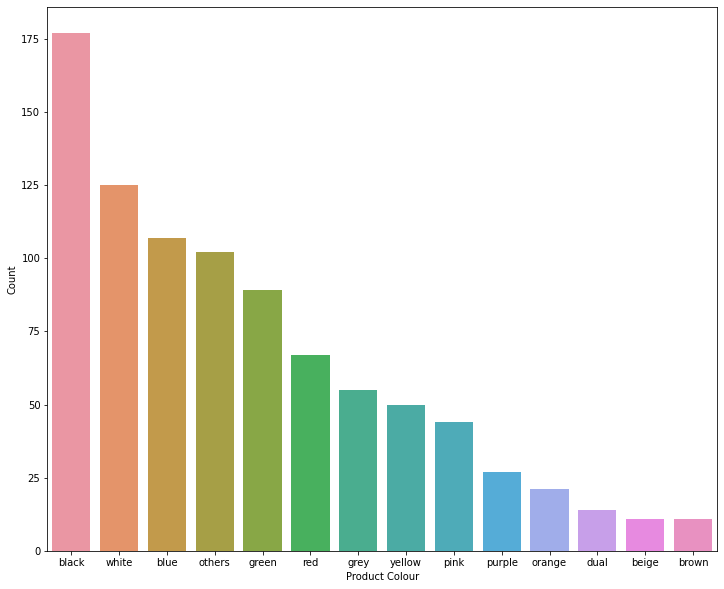

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'product_color', data = df, order = df['product_color'].value_counts().iloc[:].index)
plt.xlabel('Product Colour')
plt.ylabel('Count')
plt.show()

In [ ]:
df['origin_country'].unique()

array(['CN', 'KR', 'US', 'VN', 'TR', 'CA', 'PL', 'GB', 'DE', 'SG', 'ES',
       'TH', 'IN', 'CH', 'IT', 'VE', 'Unknown', 'NL', 'BG'], dtype=object)

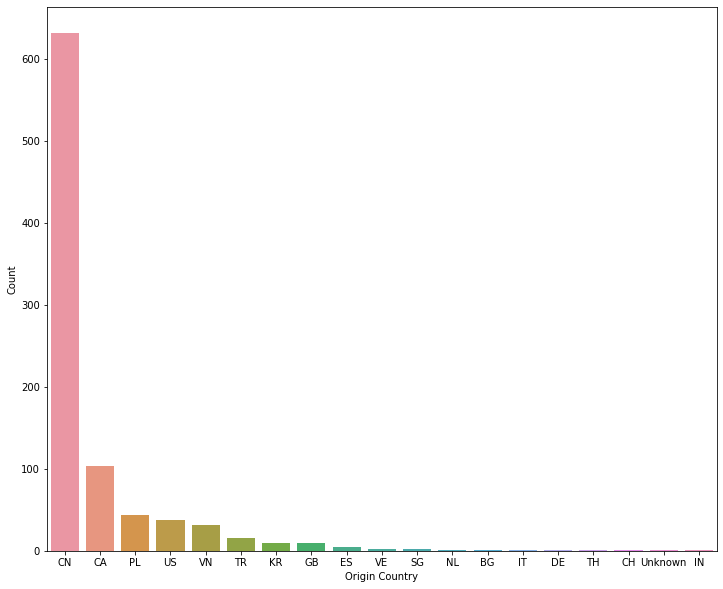

In [ ]:
plt.figure(figsize=(12,10))
sns.countplot(x = 'origin_country', data = df, order = df['origin_country'].value_counts().iloc[:].index)
plt.xlabel('Origin Country')
plt.ylabel('Count')
plt.show()